## Building a Random Generator from Scratch
<p>Here is an elegant, yet simple, explanation that I found how number generators work.</p>
<blockquote>
<p>A random seed specifies the start point when a computer generates a random number sequence. This can be any number, but it usually comes from seconds on a computer system’s clock (Henkemans & Lee, 2001).</p>
<p>Why are Seeds Needed?</p>
<p>Computers don’t generate truly random numbers—they are deterministic, which means that they operate by a set of rules. You can mimic randomness by specifying a set of rules. For example, “take a number x, add 900 +x, then subtract 52.” In order for the process to start, you have to specify a starting number, x (the seed). Let’s take the starting number 77:</p>
<p>Add 900 + 77 = 977</p>
<p>Subtract 52 = 925</p>
<p>Following the same algorithm, the second “random” number would be:</p>
<p>900 + 925 = 1825</p>
<p>Subtract 52 = 1773</p>
<p>This simple example follows a pattern, but the algorithms behind computer number generation are much more complicated (based on distributions like the Bernoulli distribution or Poisson distribution), mimicking randomness much better than I can do here. But the process still follows a pattern, which will be repeated the next time you enter 77 or 99, or whatever number you choose into the “random seed” box. (Taghizadeh, 2019)</p>
</blockquote>
<p>Therefore, random generators are not really random, hence pseudo, unlike quantum random generators. Essentially, the seed goes through an algorithm that manipulates it, making the result appear truly random. The interesting thing is that random generators for most computer languages have a seed set by the computer's clock in seconds. This is where the heart of pseudo randomness is before it undergoes manipulation from the constants <em>a</em> and <em>m</em> within the algorithm's formula.</p>
<p>*************************************<p>
<p>Furthermore, Sheldon Ross, author of <em>Simulation</em> 4th edition, states, on page 42, that "We want to choose the constants <em>a</em> and <em>m</em> so that, for any initial seed x<sub>0</sub>, the number of variables that can be generated before this repetition occurs is [too] large.... [The constant] m should be chosen to be a large prime number that can be fitted to the computer word size. For a 32-bit word machine (where the first bit is a sign bit), it has been shown that the choices of <em>m</em> = 2<sup>31</sup>-1 and <em>a</em> = 7<sup>5</sup> = 16,807 result in desirable properties."</p>
<p>Therefore, in our case, <em>m</em> will equal mod (i.e., modulo), and <em>a</em> will equal mult (i.e., multiplier/coefficient).</p>
<p>*************************************<p>
<p><center>References</center></p>
<p>Ross, S. M. (2006). <em>Simulation</em>. Amsterdam: Elsevier Academic Press.</p>
<p>Taghizadeh, Elham. (2019). Re: Can someone explain what is seed in generating a random number?. Retrieved from: https://www.researchgate.net/post/Can-someone-explain-what-is-seed-in-generating-a-random-number/5d7d10bdf0fb62656d37ded3/citation/download. </p>

In [1]:
import numpy as np
def pseudo_uniform_good(mult=16807,
                       mod=(2**31)-1,
                       seed=123456789, # pick a starting number
                       size=1):
    """
    A reasonably good pseudo random generator
    """
    U=np.zeros(size) # create an array with zero as a float
    #print("U: ",U)
    
    # generate the random number in the algorithm consisting of the seed and constants
    x=(seed*mult+1)%mod
    #print("x: ",x)
    
    U[0]=x/mod
    #print("U[0]: ",U[0])
    
    for i in range(1,size):
        x=(x*mult+1)%mod
        U[i]=x/mod
    #print("U: ",U)
    return U  

In [2]:
def pseudo_uniform(low=0,
                  high=1,
                  seed=123456789,
                  size=1):
    """
    Generates uniformly random number between 'low' and 'high' limits
    """
    return low+(high-low)*pseudo_uniform_good(seed=seed,size=size)

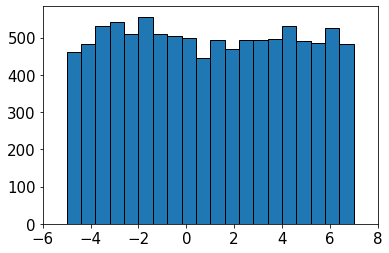

In [3]:
import matplotlib.pyplot as plt

# plot the distribution of pseudo random numbers
l=pseudo_uniform(low=-5,high=7,size=10000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-6,8)
plt.show()

In [4]:
import time
def sample_pick(lst):
    """
    Picks up a random sample from a given list
    """
    # sets seed based on the decimal portion of the current system clock
    t=time.perf_counter() # return the float value of time in seconds
    #print("t: ",t)
    
    # create a new seed based on time in seconds
    seed=int(10**9*float(str(t-int(t))[0:]))
    #print("seed: ",seed)
    
    # random sample as an index
    
    l=len(lst) # get the length of the list
    #print("l: ",l)
    
    # use length of list for the upper limit
    # generate a pseudo random number
    s=pseudo_uniform(low=0,high=l,seed=seed,size=1)
    #print("s: ",s)
    
    # change the random number from a float to an integer
    idx=int(s)
    #print("idx: ",idx)
    
    return(lst[idx])

In [5]:
dice=['one','two','three','four','five','six']

In [6]:
dice_throws=[]
for _ in range(30):
    dice_throws.append(sample_pick(dice))
print(dice_throws)

['six', 'three', 'four', 'five', 'five', 'six', 'six', 'one', 'one', 'two', 'three', 'three', 'four', 'four', 'five', 'five', 'six', 'six', 'two', 'three', 'three', 'three', 'four', 'four', 'four', 'five', 'five', 'five', 'six', 'six']
